In [1]:
import pandas as pd
import numpy as np
import matplotlib as mtlib
url = 'https://raw.githubusercontent.com/upxacademy/ML_with_Python/master/Datasets/bikeshare.csv?token=AYxzdiGnjM610dBT7PuwUnUNOmm3bGcvks5ZFDyLwA%3D%3D'
Dataset_bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)
Dataset_bikes.head()
Dataset_bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<function matplotlib.pyplot.show>

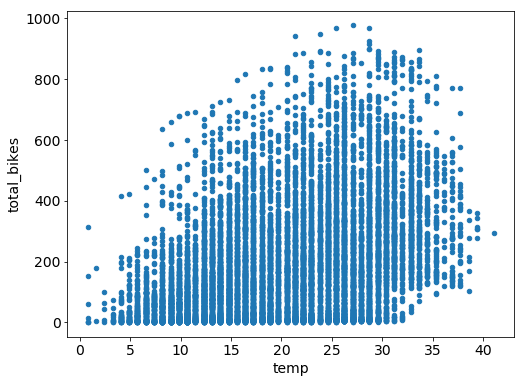

In [2]:
Dataset_bikes.describe()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
Dataset_bikes.rename(columns={'count':'total_bikes'},inplace=True)
Dataset_bikes.plot(kind='scatter',x='temp',y='total_bikes')
plt.show

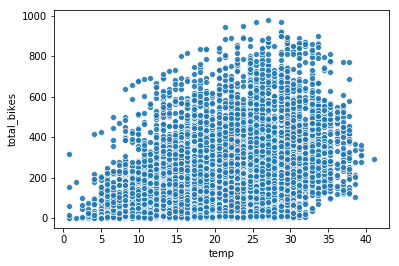

In [3]:
sns.scatterplot(data=Dataset_bikes,x='temp',y='total_bikes',alpha=0.9)

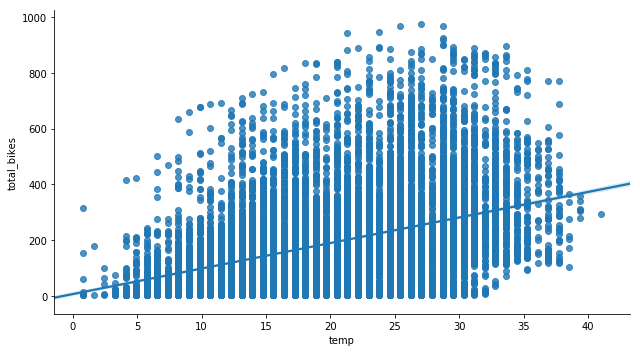

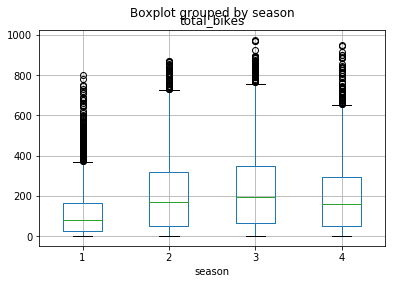

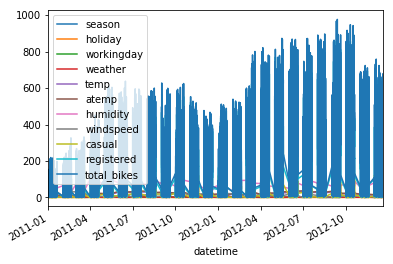

In [4]:
sns.lmplot(data=Dataset_bikes,x='temp',y='total_bikes',aspect=1.8)
Dataset_bikes.boxplot(column='total_bikes',by='season')
Dataset_bikes.plot()

In [5]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
cols=['temp','season','weather','humidity']
#x=(Dataset_bikes[cols]*9/5)+32
x=Dataset_bikes[cols]
y=Dataset_bikes['total_bikes']
linreg.fit(x,y)
#Dataset_bikes['temp_f']=(Dataset_bikes['temp']*9/5)+32

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print(linreg.coef_)
print(linreg.intercept_)
list(zip(cols,linreg.coef_))
#linreg.predict(77)
#linreg.predict([[Dataset_bikes['temp'][1]],[Dataset_bikes['season'][1]],[Dataset_bikes['weather'][1]],[Dataset_bikes['humidity'][1]]])
#op=9.17*30 + 6.04
#print(linreg.predict(30))
#print(op)
#Dataset_bikes['temp'][1]

[ 7.86482499 22.53875753  6.67030204 -3.11887338]
159.5206878612979


[('temp', 7.86482499247745),
 ('season', 22.538757532466768),
 ('weather', 6.670302035923734),
 ('humidity', -3.118873382396501)]

0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0)
Super_market <- data.frame(Age,Salary,Purchase,stringsAsFactors = F)
#set.seed(123)
training_data_sz <- floor(0.70* nrow(Super_market))
print(training_data_sz)
supermarket_training_index <- sample(1:nrow(Super_market),training_data_sz)
#print(supermarket_training_index)
super_market_train <- Super_market[supermarket_training_index,]
super_market_test <- Super_market[-supermarket_training_index,]
classifier <- glm(formula=Purchase ~ ., family=binomial,data =super_market_train)
classifier

In [7]:
# now divide the data into test and training:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)

#X_train
season_dummy=pd.get_dummies(Dataset_bikes.season,prefix='season')
season_dummy.drop('season_1',axis=1,inplace=True)
#season_dummy.head(12)
Dataset_bikes = pd.concat([Dataset_bikes,season_dummy],axis=1)
#Dataset_bikes.merge(season_dummy)
Dataset_bikes.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_bikes,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0,0,0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,0,0,0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,0,0,0
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,0,0,0
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,0,0,0


In [8]:
def train_test_rmse(feature_cols):
    X=Dataset_bikes[featurecols]
    y=Dataset_bikes.total_bikes
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
#   the input and output are used to train the model, this generates teh equation.
    linreg.fit(X_train,y_train)
#   now we pass the test data and receive the machine's output 
    y_pred = linreg.predict(X_test)
    
    #now we have the actual test results and the predicted test results, so we can calculated the mean square erorr.
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [9]:

from sklearn import metrics
linreg=LinearRegression()
featurecols=['temp','season_2','season_3','season_4']
#x=(Dataset_bikes[cols]*9/5)+32
x=Dataset_bikes[cols]
y=Dataset_bikes['total_bikes']
linreg.fit(x,y)
print(linreg.coef_)
print(linreg.intercept_)
list(zip(featurecols,linreg.coef_))

# compare original season variable with dummy variables
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))
list(zip(featurecols,linreg.coef_))

[ 7.86482499 22.53875753  6.67030204 -3.11887338]
159.5206878612979
163.16009761180223
163.16009761180223


[('temp', 7.86482499247745),
 ('season_2', 22.538757532466768),
 ('season_3', 6.670302035923734),
 ('season_4', -3.118873382396501)]

In [10]:
X=Dataset_bikes[featurecols]
y=Dataset_bikes.total_bikes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

print (train_test_rmse(['temp']))
# evaluate using  null rmse
y_null=np.zeros_like(y_test,dtype=float)
y_null.fill(y_test.mean())
y_null
x=np.sqrt(metrics.mean_squared_error(y_test, y_null))
x

163.16009761180223


179.57906896465727